### Load Data

In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('ford.csv')

### Data Exploration

In [207]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [208]:
df.shape

(17966, 9)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [216]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [217]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [219]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

### Pre-Processing data

In [226]:
from sklearn.preprocessing import LabelEncoder

encoder_model = LabelEncoder()
encoder_transmission = LabelEncoder()
encoder_fuelType = LabelEncoder()

In [227]:
df['model'] = encoder_model.fit_transform(df['model'].values)

In [228]:
df['transmission'] = encoder_transmission.fit_transform(df['transmission'].values)

In [229]:
df['fuelType'] = encoder_fuelType.fit_transform(df['fuelType'].values)

In [230]:
df.dtypes

model             int32
year              int64
price             int64
transmission      int32
mileage           int64
fuelType          int32
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [231]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,0,15944,4,150,57.7,1.0
1,6,2018,14000,1,9083,4,150,57.7,1.0
2,6,2017,13000,1,12456,4,150,57.7,1.0
3,5,2019,17500,1,10460,4,145,40.3,1.5
4,5,2019,16500,0,1482,4,145,48.7,1.0


### Data Visualization

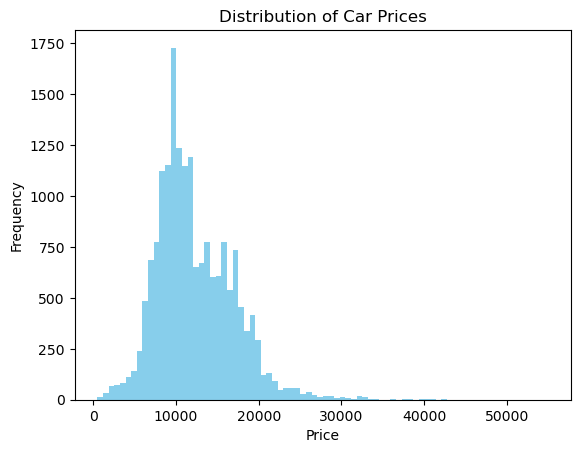

In [235]:
plt.hist(df['price'], bins=80, color='skyblue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()

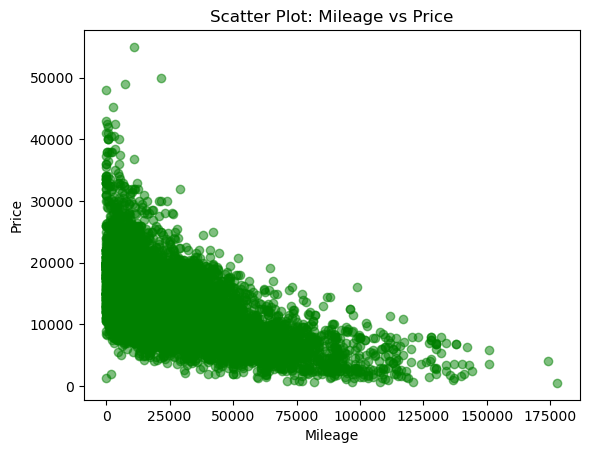

In [236]:
plt.scatter(df['mileage'], df['price'], color='green', alpha=0.5)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Scatter Plot: Mileage vs Price')
plt.show()

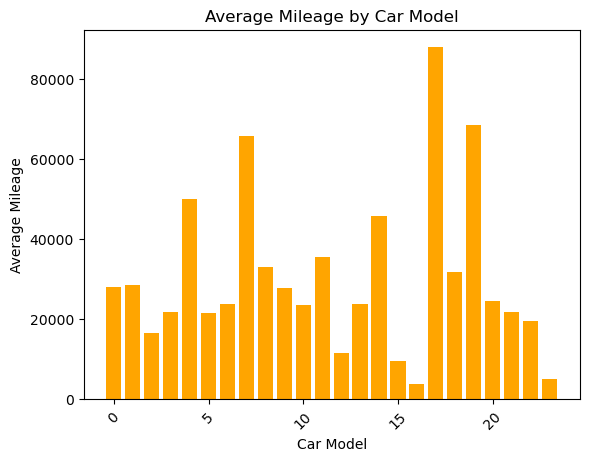

In [238]:
avg_mileage_by_model = df.groupby('model')['mileage'].mean()
plt.bar(avg_mileage_by_model.index, avg_mileage_by_model.values, color='orange')
plt.xlabel('Car Model')
plt.ylabel('Average Mileage')
plt.title('Average Mileage by Car Model')
plt.xticks(rotation=45)
plt.show()

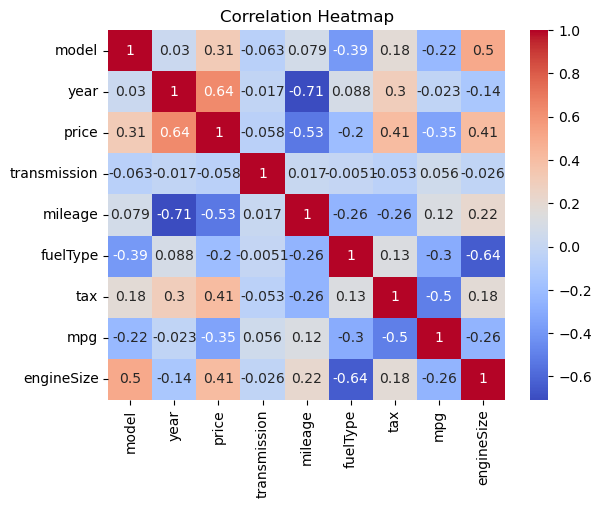

In [239]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

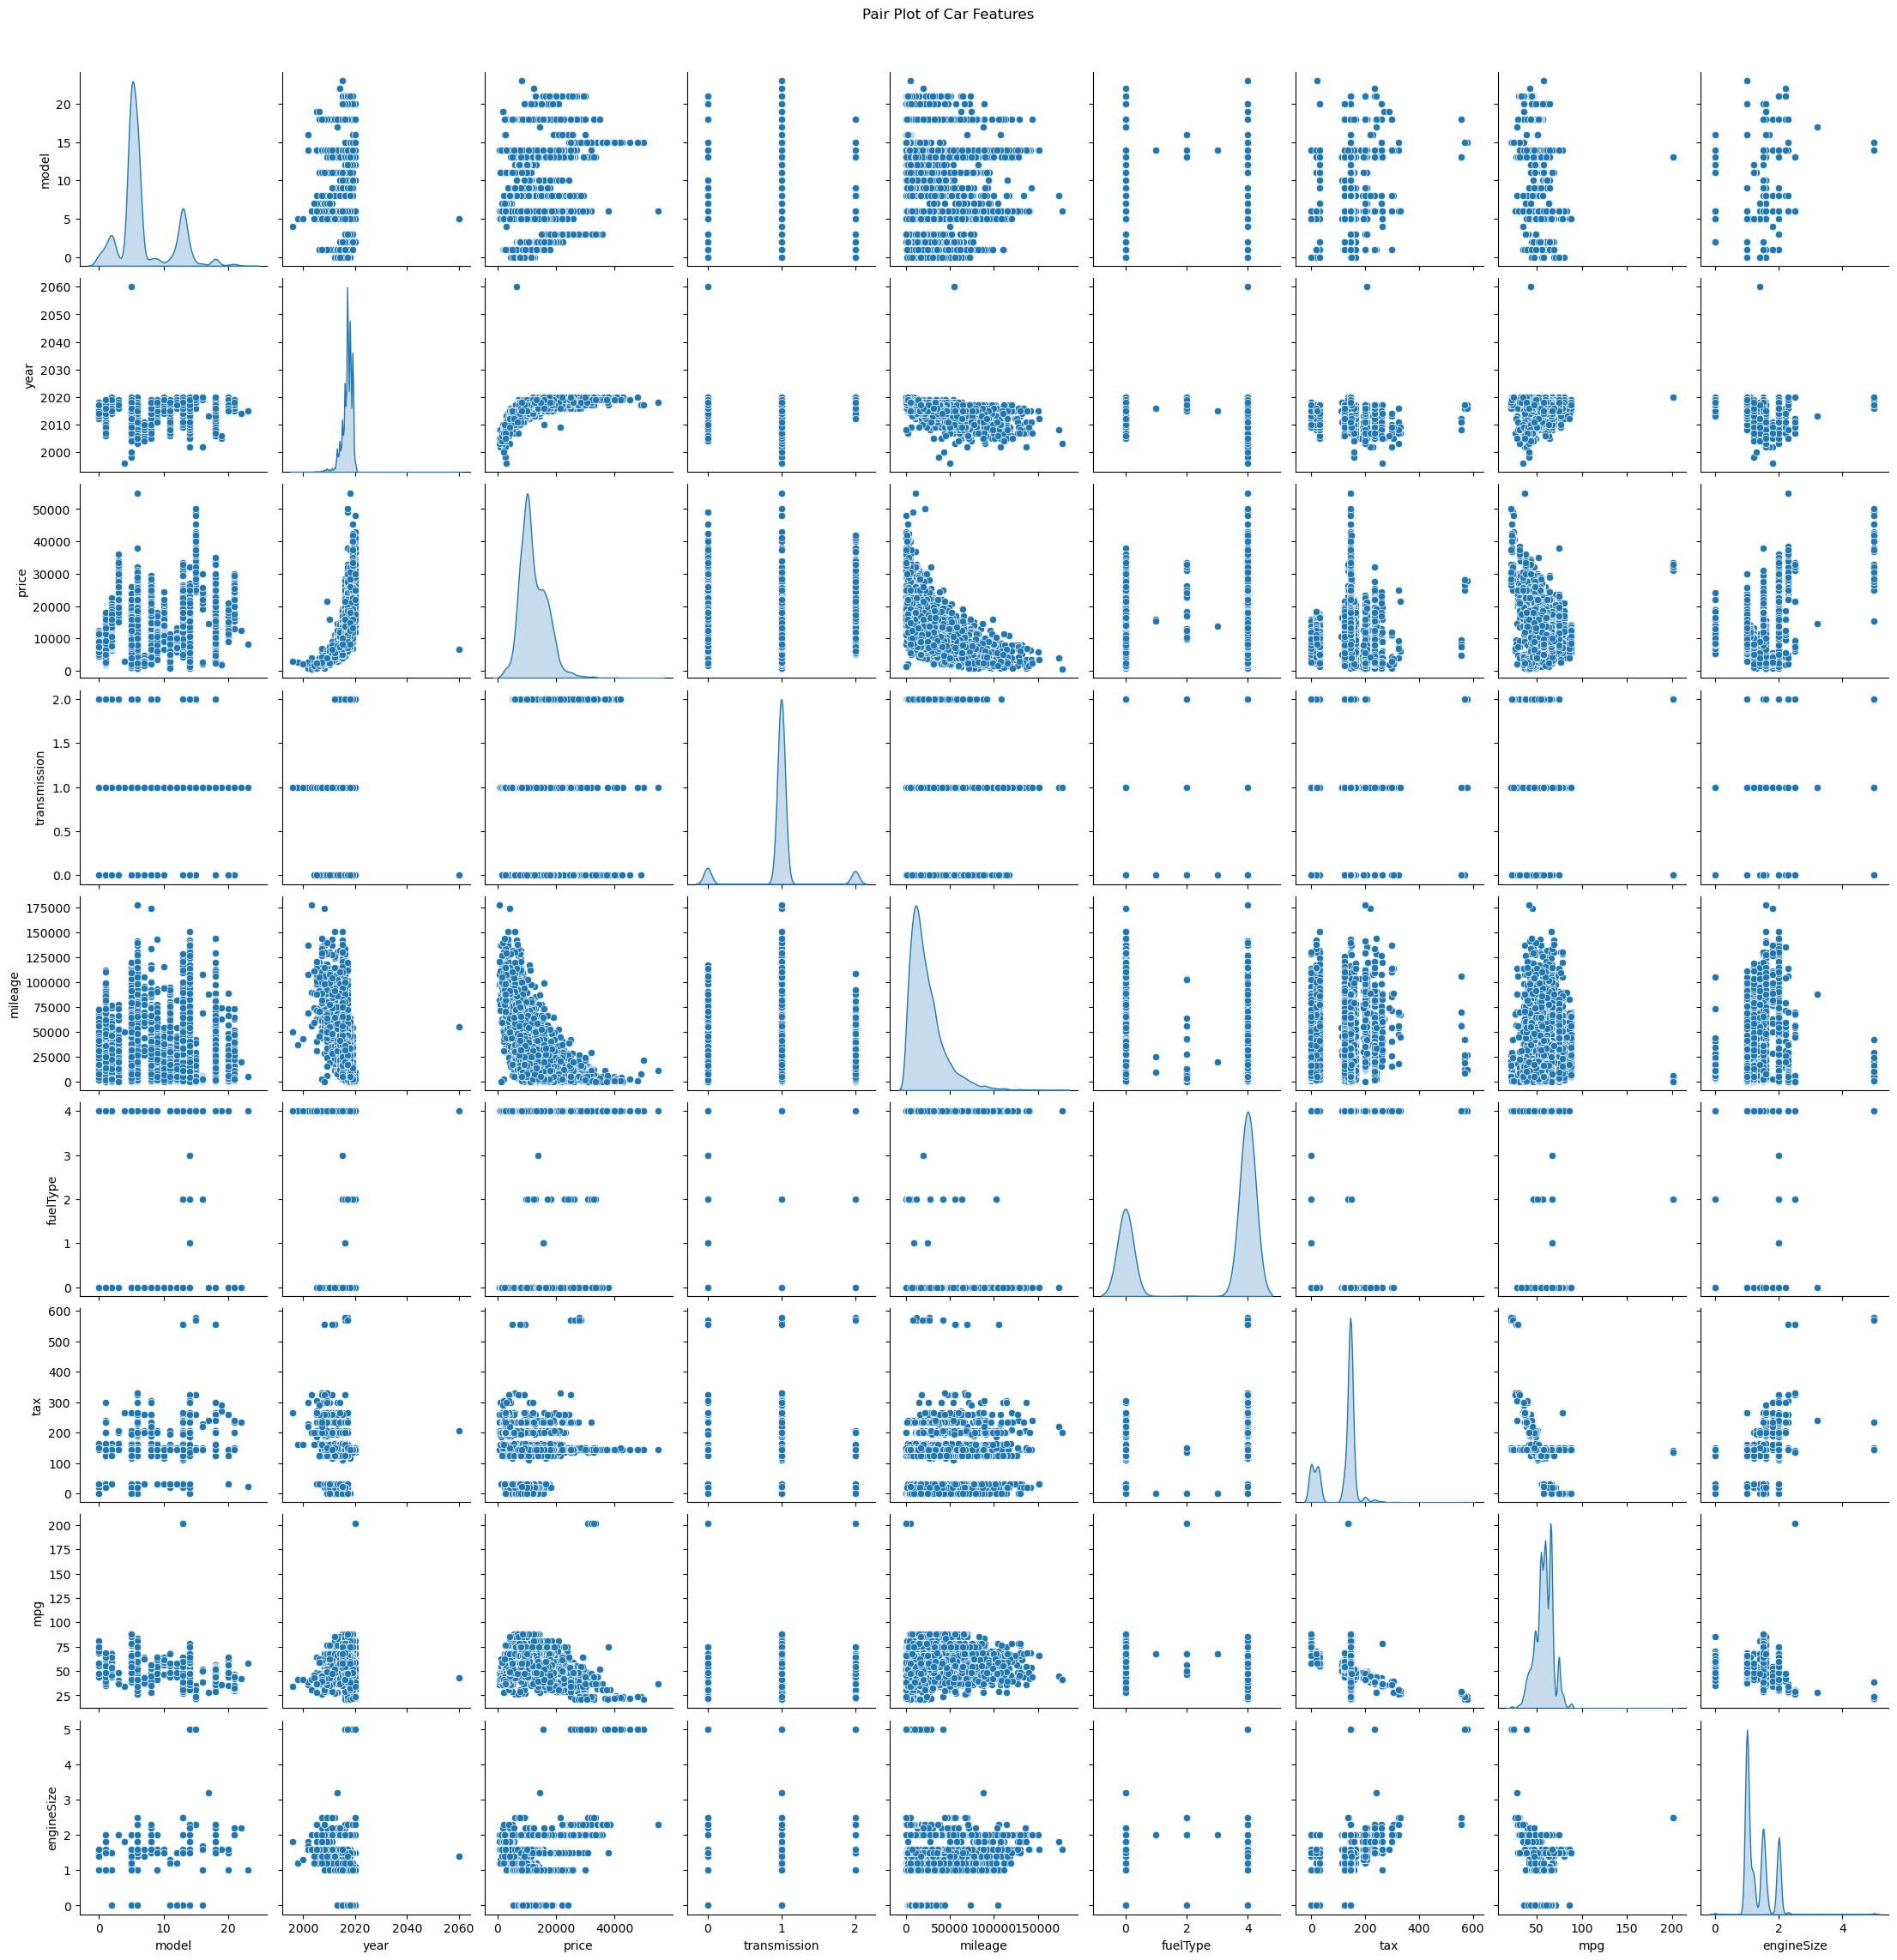

In [240]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pair Plot of Car Features', y=1.02)
plt.show()

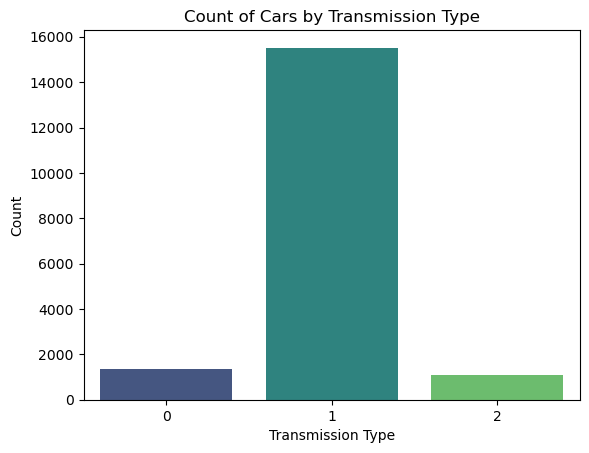

In [249]:
sns.countplot(x='transmission', data=df, palette='viridis')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.title('Count of Cars by Transmission Type')
plt.show()

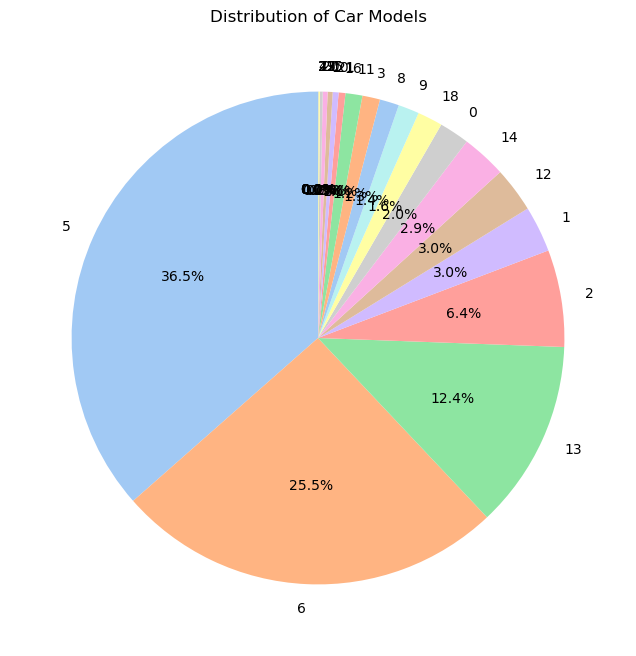

In [256]:
model_counts = df['model'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(model_counts, labels=model_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Car Models')
plt.show()

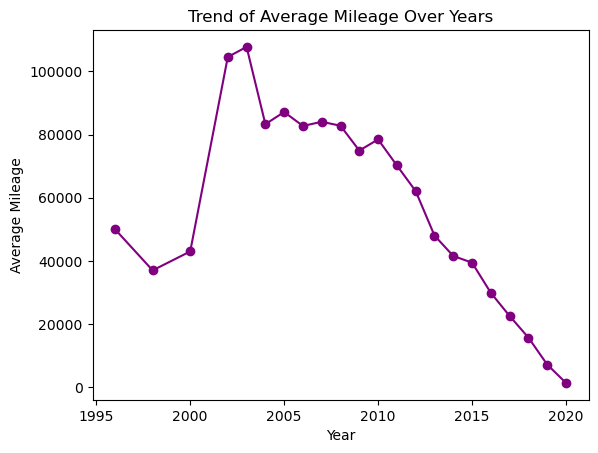

In [257]:
avg_mileage_by_year = df.groupby('year')['mileage'].mean()
plt.plot(avg_mileage_by_year.index, avg_mileage_by_year.values, marker='o', color='purple')
plt.xlabel('Year')
plt.ylabel('Average Mileage')
plt.title('Trend of Average Mileage Over Years')
plt.show()

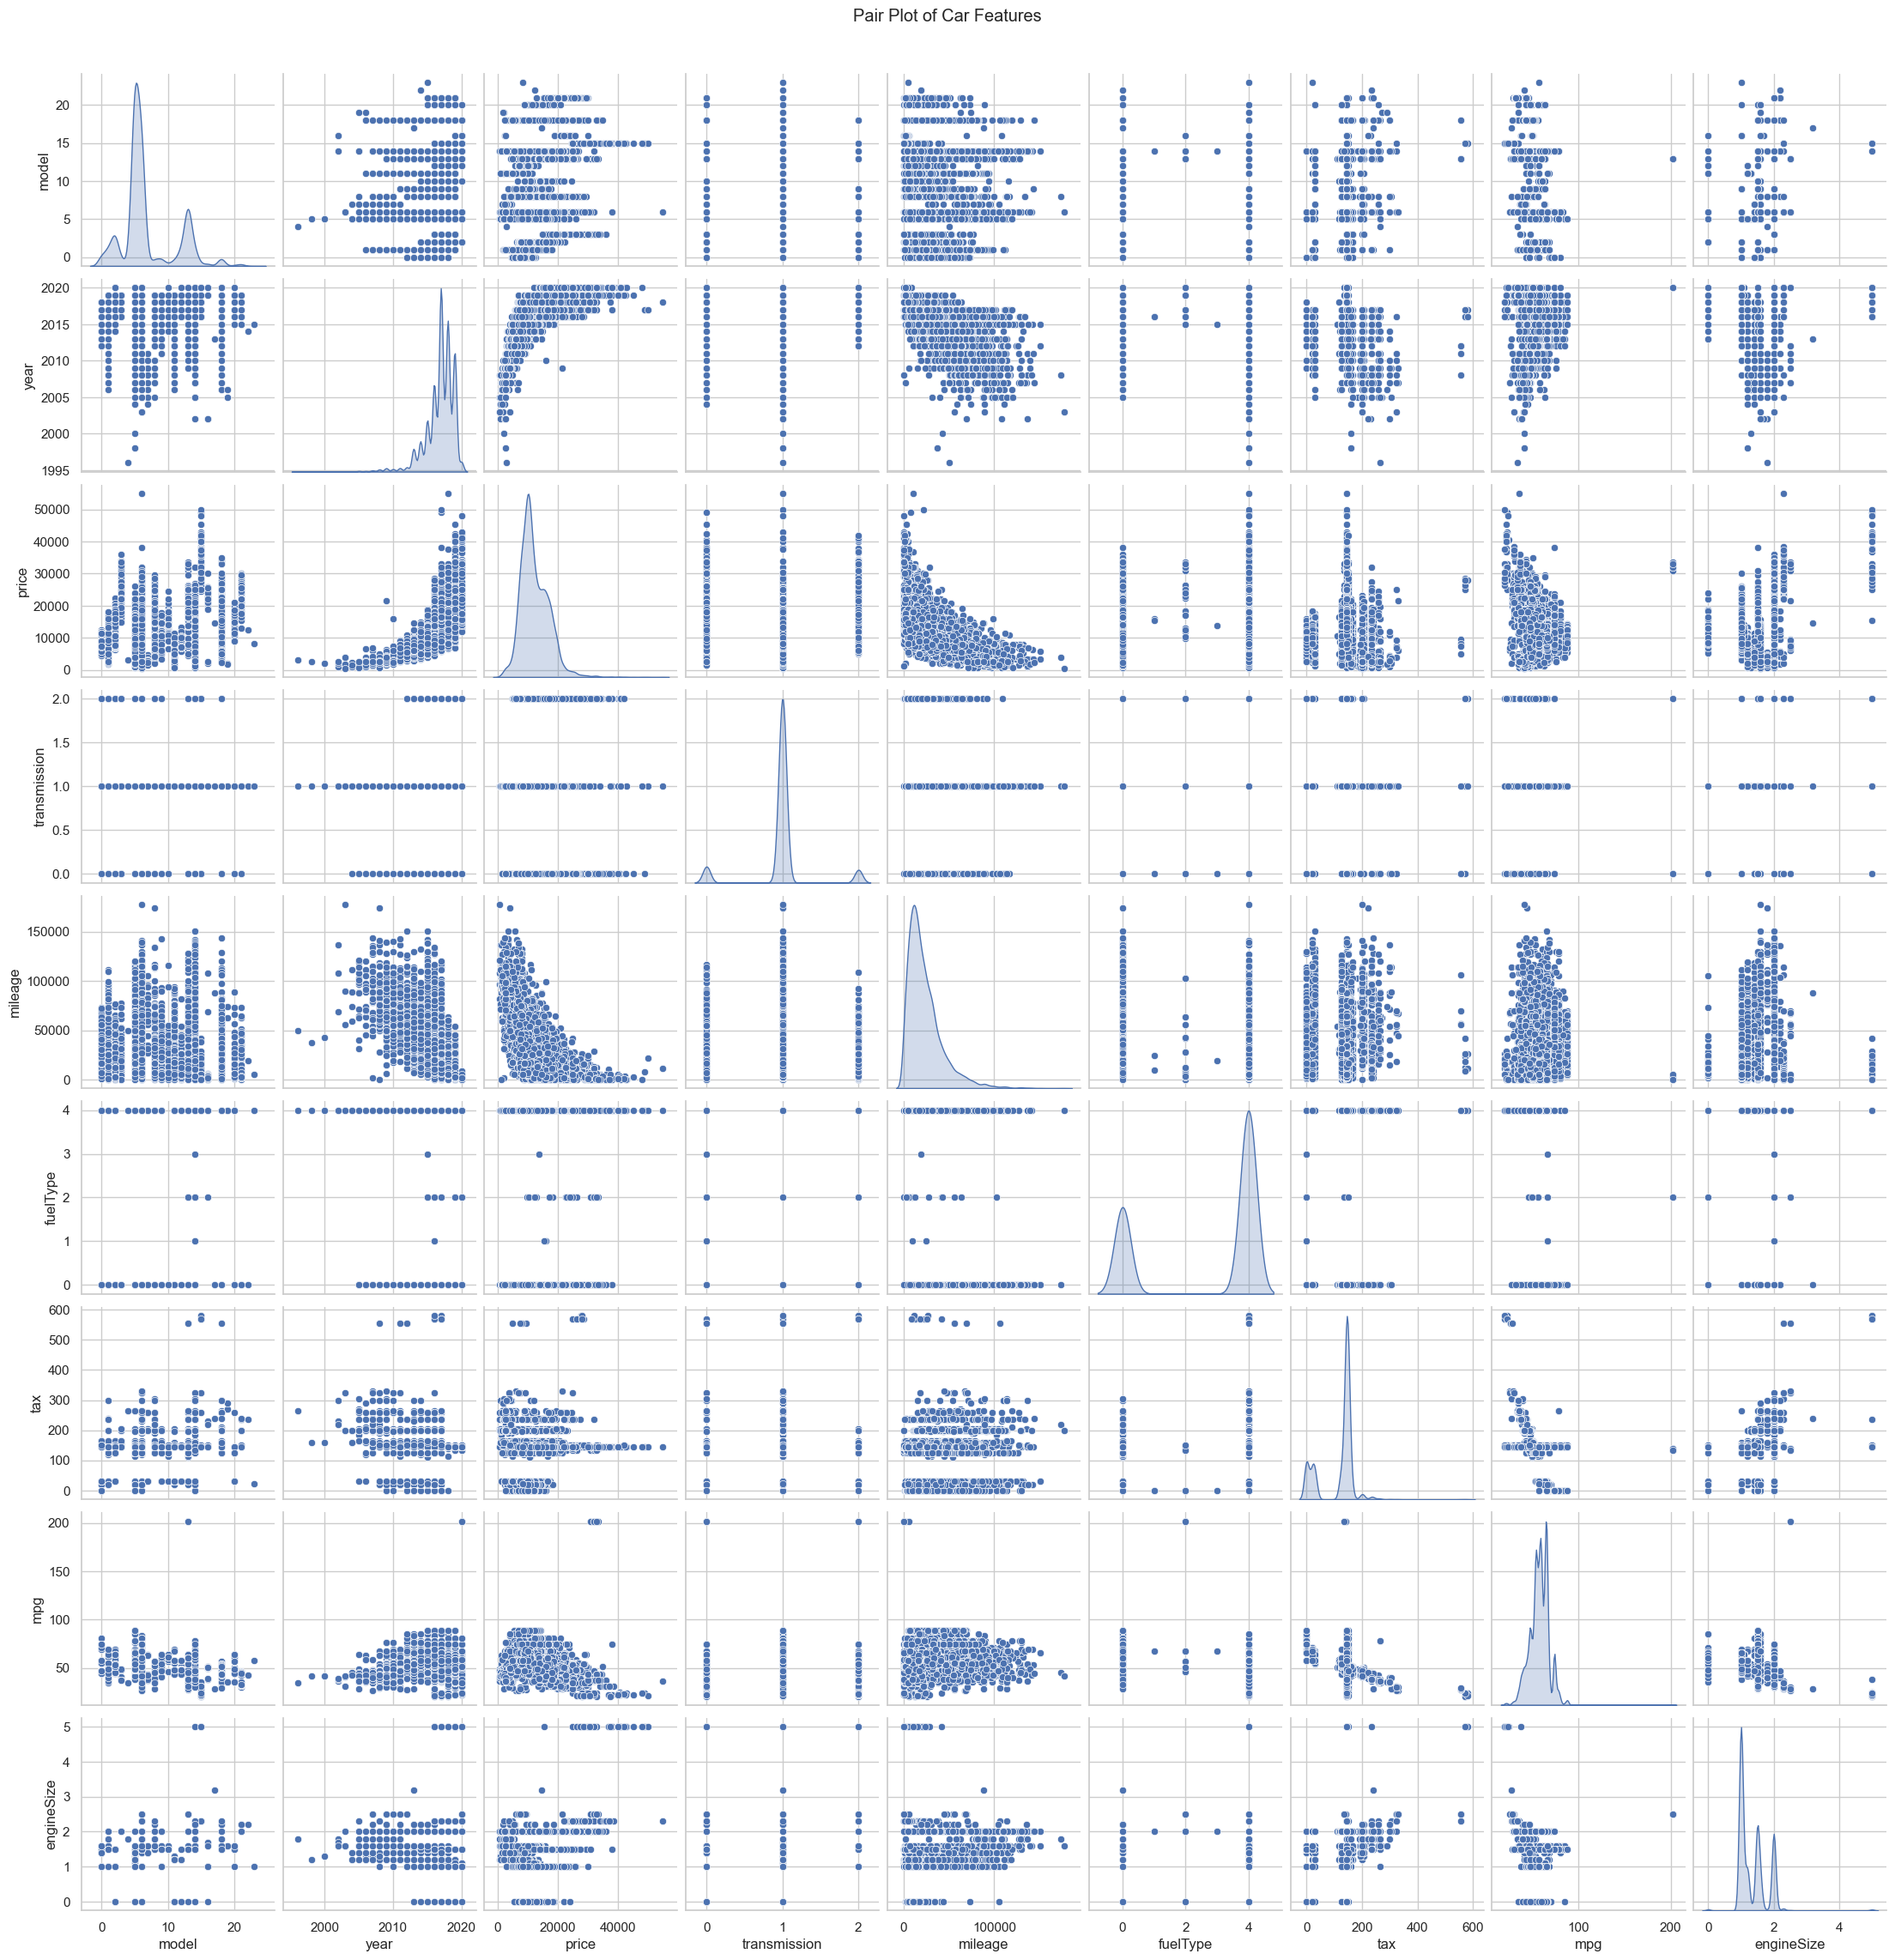

In [260]:
sns.set(style='whitegrid')
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pair Plot of Car Features', y=1.02)
plt.show()

In [252]:
df['year'] = df['year'].replace(2060, 2006)

In [253]:
df.describe()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,6.848547,2016.863464,12279.534844,0.984749,23362.608761,2.714294,113.329456,57.906980,1.350807
std,4.012594,2.026544,4741.343657,0.368826,19472.054349,1.866703,62.012456,10.125696,0.432367
min,0.000000,1996.000000,495.000000,0.000000,1.000000,0.000000,0.000000,20.800000,0.000000
25%,5.000000,2016.000000,8999.000000,1.000000,9987.000000,0.000000,30.000000,52.300000,1.000000
50%,6.000000,2017.000000,11291.000000,1.000000,18242.500000,4.000000,145.000000,58.900000,1.200000
75%,8.000000,2018.000000,15299.000000,1.000000,31060.000000,4.000000,145.000000,65.700000,1.500000
max,23.000000,2020.000000,54995.000000,2.000000,177644.000000,4.000000,580.000000,201.800000,5.000000


### Save Encoders and data

In [261]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,0,15944,4,150,57.7,1.0
1,6,2018,14000,1,9083,4,150,57.7,1.0
2,6,2017,13000,1,12456,4,150,57.7,1.0
3,5,2019,17500,1,10460,4,145,40.3,1.5
4,5,2019,16500,0,1482,4,145,48.7,1.0


In [263]:
df.to_csv('final_ford.csv')

In [273]:
import pickle 

encoders = {
    'encoder_transmission' : encoder_transmission,
    'encoder_fuelType' : encoder_fuelType,
    'encoder_model' : encoder_model,
}

with open('encoders.pkl', 'wb') as f: 
    pickle.dump(encoders, f) 

In [274]:
import pickle 

with open('encoders.pkl', 'rb') as file: 
    encoders2 = pickle.load(file) 

In [277]:
encoders2['encoder_transmission'].classes_

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [278]:
encoders2['encoder_fuelType'].classes_

array(['Diesel', 'Electric', 'Hybrid', 'Other', 'Petrol'], dtype=object)

In [279]:
encoders2['encoder_model'].classes_

array([' B-MAX', ' C-MAX', ' EcoSport', ' Edge', ' Escort', ' Fiesta',
       ' Focus', ' Fusion', ' Galaxy', ' Grand C-MAX',
       ' Grand Tourneo Connect', ' KA', ' Ka+', ' Kuga', ' Mondeo',
       ' Mustang', ' Puma', ' Ranger', ' S-MAX', ' Streetka',
       ' Tourneo Connect', ' Tourneo Custom', ' Transit Tourneo', 'Focus'],
      dtype=object)